In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras.optimizers import Adam

## Step 1: Pre-process and create train set

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('train/',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 150 images belonging to 5 classes.


## Step 2: pre-process and create test set

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('test/',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 132 images belonging to 5 classes.


In [16]:
#import IPython.display as ipd

#ipd.Image('training/training/n5/n5024.jpg')

## Step 3: Import the pre- trained model 

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50

base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
#InceptionV3(input_shape = (299, 299, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

## Step 4: Add Flattening, hidden and output layers

In [18]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(5, activation='sigmoid')(x)

resnet = tf.keras.models.Model(base_model.input, x)
resnet.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'], )

In [19]:
resnet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

## Step 5: Train the model

In [20]:
Resnet_hist=resnet.fit(training_set, validation_data=test_set, epochs=15)

Epoch 1/15
5/5 [==============================] - 38s 6s/step - loss: 2.2579 - accuracy: 0.2133 - val_loss: 1.8402 - val_accuracy: 0.2121
Epoch 2/15
5/5 [==============================] - 25s 5s/step - loss: 2.0392 - accuracy: 0.2000 - val_loss: 1.7254 - val_accuracy: 0.1288
Epoch 3/15
5/5 [==============================] - 23s 5s/step - loss: 1.7249 - accuracy: 0.1733 - val_loss: 1.5581 - val_accuracy: 0.2500
Epoch 4/15
5/5 [==============================] - 24s 5s/step - loss: 1.5816 - accuracy: 0.2600 - val_loss: 1.6998 - val_accuracy: 0.2273
Epoch 5/15
5/5 [==============================] - 23s 5s/step - loss: 1.5446 - accuracy: 0.2933 - val_loss: 1.5925 - val_accuracy: 0.2500
Epoch 6/15
5/5 [==============================] - 23s 5s/step - loss: 1.5899 - accuracy: 0.2533 - val_loss: 1.5377 - val_accuracy: 0.2955
Epoch 7/15
5/5 [==============================] - 24s 5s/step - loss: 1.5935 - accuracy: 0.3200 - val_loss: 1.6440 - val_accuracy: 0.2879
Epoch 8/15
5/5 [==================

## Step 6: Train and Test accuracy, loss plots

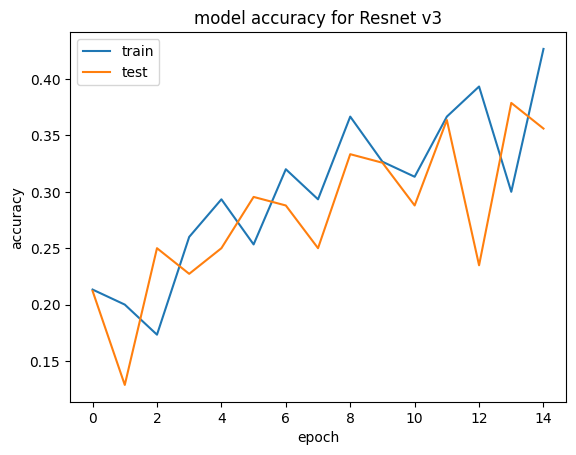

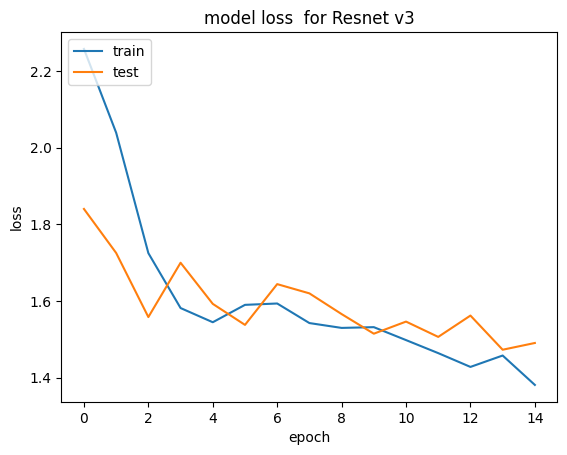

In [21]:
# summarize history for accuracy
plt.plot(Resnet_hist.history['accuracy'])
plt.plot(Resnet_hist.history['val_accuracy'])
plt.title('model accuracy for Resnet v3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(Resnet_hist.history['loss'])
plt.plot(Resnet_hist.history['val_loss'])
plt.title('model loss  for Resnet v3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
resnet.save('resnet50_model')  # The SavedModel format

INFO:tensorflow:Assets written to: resnet50_model\assets


INFO:tensorflow:Assets written to: resnet50_model\assets


In [23]:
import json

# Convert the history.history dict to a JSON file
with open('inception_training_history.json', 'w') as f:
    json.dump(Resnet_hist.history, f)

In [24]:
from tensorflow.keras.models import load_model

#model = load_model('inception_model.h5')  # For HDF5 format
# or
# model2 = load_model('resnet_model')  # For SavedModel format

#with open('inception_training_history.json', 'r') as f:
#    history = json.load(f)
